## Import Libraries 

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import seaborn as sns

### Read Data 

In [ ]:
data = pd.read_csv("sample_data_set_2 - Sheet1 (1).csv")

In [ ]:
data.head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
0,08 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0
1,08 Sep 2020,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2
2,08 Sep 2020,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2
3,08 Sep 2020,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2
4,06 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0


In [ ]:
data.shape

(48293, 12)

### Unique Apps count 

In [ ]:
data["App"].nunique()

242

### Unique Add Group

In [ ]:
data["Ad Group"].nunique()

188

### Revenue Distribution Across Apps 

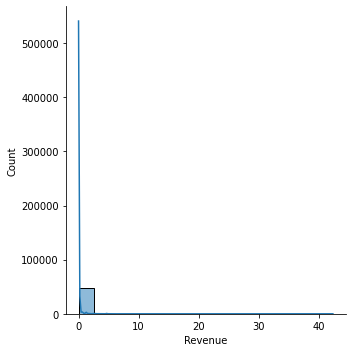

In [ ]:
sns.displot(data["Revenue"], kde = True)

### According to the graph we can see the majority of the apps are giving 0$ revenue 

# Q1 - How would you increase the overall revenue for an app?

## OverALL Revenue Apps wise 

In [ ]:
App_revenue = pd.DataFrame(data.groupby(['App'])['Revenue'].sum().sort_values(ascending = False))

In [ ]:
App_revenue

,Revenue
App,
Callbreak Multiplayer,869.40
Bottle Shooting Game,753.89
World Cricket Championship 2,643.44
Traffic Bangalore: Check Fines,280.33
World Cricket Championship Lt,145.27
...,...
Halloween Cars: Monster Race,0.00
Halloween Town Racing,0.00
Hey Flower,0.00


## Apps which are giving Revenue > 0 

In [ ]:
App_revenue[App_revenue["Revenue"] > 0]

,Revenue
App,
Callbreak Multiplayer,869.40
Bottle Shooting Game,753.89
World Cricket Championship 2,643.44
Traffic Bangalore: Check Fines,280.33
World Cricket Championship Lt,145.27
Indian Rummy Offline,104.28
Tarot Cards Reading and Numerology App,98.86
Mindi Offline,87.34
Indian Train Simulator 2018,68.51


In [ ]:
App_revenue[App_revenue["Revenue"] > 0].shape

(45, 1)

### So out of 242 apps we have 45 apps which are generating some amount of revenue. 

## Apps wise data  

In [ ]:
app_metrics = pd.DataFrame(data.groupby(['App']).agg({'Revenue':'sum', 
                         'Ad Requests':'sum', 
                         'Ad Responses':'sum', 
                         'Impressions': 'sum',
                         '1st Clicks': 'sum',
                         '2nd Clicks': 'sum'}).sort_values('Revenue' ,ascending = False))

In [ ]:
app_metrics

,Revenue,Ad Requests,Ad Responses,Impressions,1st Clicks,2nd Clicks
App,,,,,,
Callbreak Multiplayer,869.40,2831311892,131423691,117137950,1092797,418077
Bottle Shooting Game,753.89,209701332,17484947,13112978,1121532,330501
World Cricket Championship 2,643.44,308410754,15099068,12068458,763675,149724
Traffic Bangalore: Check Fines,280.33,1791119,1728060,1011597,11955,2
World Cricket Championship Lt,145.27,17363413,1475191,1001420,170866,29033
...,...,...,...,...,...,...
Halloween Cars: Monster Race,0.00,2,0,0,0,0
Halloween Town Racing,0.00,1,0,0,0,0
Hey Flower,0.00,61,56,42,0,0


## APPs where Rveneue is 0 and Ad Response is > 0 

In [ ]:
app_metrics[(app_metrics["Revenue"] == 0) & (app_metrics["Ad Responses"] > 0)]

,Revenue,Ad Requests,Ad Responses,Impressions,1st Clicks,2nd Clicks
App,,,,,,
OCR Barcod Scanner,0.0,1,1,0,0,0
Masala Express: Cooking Game,0.0,221,97,87,0,0
PocketLeague Store,0.0,24172,6954,6701,91,54
Naughty Girlfriend :pseudo app,0.0,223,183,118,20,19
Math Door,0.0,187117,69987,48610,5355,1062
...,...,...,...,...,...,...
GK Hindi,0.0,1911,1265,412,2,0
Gionee Project,0.0,5337,2162,977,4,4
Hey Flower,0.0,61,56,42,0,0


### Out of 242 apps we found 67 apps where we have Ad response but the impression and clicks are verry less. And they are not able to attract population hence not generating the revenue. 

## Apps where Revenue == 0 and Ad Response == 0 

In [ ]:
app_metrics[(app_metrics["Revenue"] == 0) & (app_metrics["Ad Responses"] == 0)]

,Revenue,Ad Requests,Ad Responses,Impressions,1st Clicks,2nd Clicks
App,,,,,,
Paradise Island Summer Fun Run,0.0,2,0,0,0,0
Offroad Tuk Tuk Hill Adventure,0.0,417,0,0,0,0
Marbel Belajar Membaca,0.0,22,0,0,0,0
Pet Friends Park Racing,0.0,4,0,0,0,0
Philippine Slam! - Basketball,0.0,1,0,0,0,0
...,...,...,...,...,...,...
GodSpeed Cricket League,0.0,27,0,0,0,0
Gujarat Lions 2017,0.0,11330,0,0,0,0
Gujarat Lions T20 Cricket Game,0.0,236,0,0,0,0


### Out of 242 apps we found 130 apps where Ad Response is completly 0. May be quality of the ads is very poor because they are not able to generate Ad Response. With out generating the response we can't think of revenue.

## According to above analysis, we can say to increase overall revenue we need to think about the quality of ad group and apps also. Because out of 242 apps 130 apps are not getting any ad response, also we need to plan where we need to show these ads, which are our targeting audiance. Because its important to know your targeting audience and right time to target them so that you can generate good revenue. Also for testing various ad groups you can start doing AB testing so that you can come up with attractive ads.  

# Q2 - Are there any discrepancies in the data set shared with you? What are the possible reasons for such mismatch?

## Apps without Ad request -- 

In [ ]:
app_metrics[(app_metrics["Revenue"] == 0) & (app_metrics["Ad Requests"] == 0)]

,Revenue,Ad Requests,Ad Responses,Impressions,1st Clicks,2nd Clicks
App,,,,,,
39052237,0.0,0,0,0,0,0
12611047,0.0,0,0,0,0,0


### This could be some errors in the data because app name is just some number and every metrics is 0 

In [ ]:
data.head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
0,08 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0
1,08 Sep 2020,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2
2,08 Sep 2020,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2
3,08 Sep 2020,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2
4,06 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0


### Also fill rate % is showing error according to definition which is provided in pdf. 

In [ ]:
data["fill_rate_%"] = (data["Ad Responses"] / data["Ad Requests"]) * 100

In [ ]:
data.head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks,fill_rate_%
0,08 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0,99.845461
1,08 Sep 2020,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2,0.003026
2,08 Sep 2020,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2,0.002441
3,08 Sep 2020,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2,0.002823
4,06 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0,99.878250


### The right fill rate is in new column named as fill_rate% 

### The reasoning behind this - This could be manual error or formula error while gathering the data. 

Other Reasons:
1. Our Data Isn’t Properly Cleansed
2. We Failed to Normalize the Data
3. Our Algorithms are Inaccurate
4. Our Models are Too Complicated or Too Simplistic
5. We are Holding a Bias That Skews Your Interpretations


## Q3 -- If you had a classification mechanism, which apps would you classify as Tier 1 or Important category for GG? Explain your reasoning.

In [ ]:
app_metrics.head(5)

,Revenue,Ad Requests,Ad Responses,Impressions,1st Clicks,2nd Clicks
App,,,,,,
Callbreak Multiplayer,869.40,2831311892,131423691,117137950,1092797,418077
Bottle Shooting Game,753.89,209701332,17484947,13112978,1121532,330501
World Cricket Championship 2,643.44,308410754,15099068,12068458,763675,149724
Traffic Bangalore: Check Fines,280.33,1791119,1728060,1011597,11955,2
World Cricket Championship Lt,145.27,17363413,1475191,1001420,170866,29033


### these are the top 5 apps for GreedyGames which are generating more than 80 % part of the revenue, thats why we can classify these app as a Tier 1 or Important category. 

## Ad Group wise Analysis 

In [ ]:
addgrp = data.pivot_table(index = ['App', 'Ad Group'], 
                       aggfunc={'Revenue':'sum', 
                         'Ad Requests':'sum', 
                         'Ad Responses':'sum', 
                         'Impressions': 'sum',
                         '1st Clicks': 'sum',
                         '2nd Clicks': 'sum'}).reset_index().sort_values(["Revenue"], ascending=[False])

In [ ]:
addgrp

,App,Ad Group,1st Clicks,2nd Clicks,Ad Requests,Ad Responses,Impressions,Revenue
104,Bottle Shooting Game,Bottle Shooting Game_Admob_ML,128963,35054,17485304,3727076,2090511,350.40
156,Callbreak Multiplayer,Callbreak Multiplayer2_Inmobi_No Floor,82826,26686,131428733,3534284,2828252,264.99
699,Traffic Bangalore: Check Fines,Traffic bangalore_Admob_New Banner,8385,1,892342,852269,645429,211.05
797,World Cricket Championship 2,WCC2_Inmobi_H,63282,9551,15378146,994407,824741,164.40
161,Callbreak Multiplayer,Dream11_NonCore,279942,71446,131122454,51045900,47095154,162.26
...,...,...,...,...,...,...,...,...
299,India GST Calculator,revshare,43,43,196550,7329,6310,0.00
301,Indian Rummy Offline,Ajusolo_Mal,77,18,660541,18893,18178,0.00
302,Indian Rummy Offline,Danish&satish,107,27,884816,26742,26033,0.00
304,Indian Rummy Offline,Danishsolo_Kan,115,36,785323,20129,19255,0.00


In [ ]:
top_ad_with_rev = addgrp.groupby('App').head(1).reset_index(drop = True)

## Top revenue generating app with their top revenue generating AdGroup

In [ ]:
top_ad_with_rev[top_ad_with_rev["Revenue"] > 0]

,App,Ad Group,1st Clicks,2nd Clicks,Ad Requests,Ad Responses,Impressions,Revenue
0,Bottle Shooting Game,Bottle Shooting Game_Admob_ML,128963,35054,17485304,3727076,2090511,350.40
1,Callbreak Multiplayer,Callbreak Multiplayer2_Inmobi_No Floor,82826,26686,131428733,3534284,2828252,264.99
2,Traffic Bangalore: Check Fines,Traffic bangalore_Admob_New Banner,8385,1,892342,852269,645429,211.05
3,World Cricket Championship 2,WCC2_Inmobi_H,63282,9551,15378146,994407,824741,164.40
4,Tarot Cards Reading and Numerology App,4700_Tarot Card_AdMob_Banner,563,0,66997,66564,64062,98.86
5,Indian Train Simulator 2018,Rooter_Cricket,66020,65914,1126992,719637,701952,65.88
6,Nursing Exam,Nursing_Exam_Admob_Banner_4696,1129,0,155925,145693,103393,55.17
7,Sticker Maker,sticker Maker (a/b) experiment,425,0,215720,79979,24385,50.65
8,World Cricket Championship Lt,WCC1_Admob,51328,7810,1328299,411644,236298,46.67
9,Talk Now – Audio Chat to English speaking prac...,4718_talk Now - Native - Admob - Native Chat H...,1544,1700,1170210,584759,219806,43.88


### According to this analysis in every apps these are 1 top ad group which are generating top revenue for them. To generate more revenue we can use more these ad groups also we can think of same. 

###Q 4- Are there any ad groups which are causing an opportunity loss for the app? If yes, how would you mitigate it?

###Various ad groups are not generating the revenues. To tackle this problem we can think of AB testing before launching any ads or ad groups.So that we know which type of ads attract more population.So that we can generate more impressions and clicks.And generate good revenue.
